In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense,MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential,load_model
import cv2
from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist

In [2]:
(X_train,Y_train),(X_test,Y_test)= mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


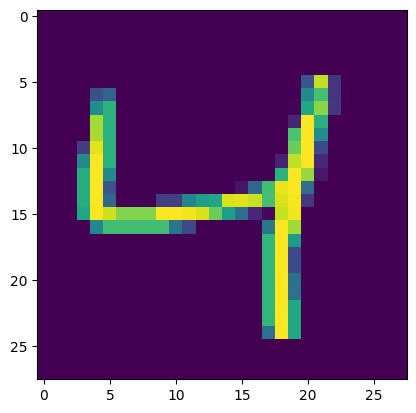

In [4]:
plt.imshow(X_train[2])

In [5]:
Y_train[2]

4

In [6]:
X_train = X_train.reshape(-1,28,28,1).astype('float')/255
X_test = X_test.reshape(-1,28,28,1).astype('float')/255


In [7]:
model=Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

print(model.summary())

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_val,Y_train,Y_val= train_test_split(X_train,Y_train,test_size=0.15,random_state=42)


In [9]:
X_val.shape

(9000, 28, 28, 1)

In [10]:
X_train.shape

(51000, 28, 28, 1)

In [11]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_val,Y_val))

loss,accuracy = model.evaluate(X_test,Y_test,verbose=0)

print('Test loss',loss)
print('Test accuracy',accuracy)

Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8454 - loss: 0.4878 - val_accuracy: 0.9802 - val_loss: 0.0645
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9672 - loss: 0.1067 - val_accuracy: 0.9887 - val_loss: 0.0378
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9788 - loss: 0.0737 - val_accuracy: 0.9912 - val_loss: 0.0320
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9826 - loss: 0.0535 - val_accuracy: 0.9916 - val_loss: 0.0291
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9858 - loss: 0.0490 - val_accuracy: 0.9892 - val_loss: 0.0398
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9880 - loss: 0.0384 - val_accuracy: 0.9916 - val_loss: 0.0283
Epoch 7/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9879 - loss: 0.0379 - val_accuracy: 0.9922 - val_loss: 0.0276
Epoch 8/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9888 - loss: 

In [12]:
model.save('handwritten_mnist.keras')

In [2]:

from tensorflow.keras.models import Sequential,load_model
model = load_model('handwritten_mnist.keras')

In [3]:
# plt.imshow(X_train[0])

In [5]:
import cv2
import numpy as np
drawing=False
cv2.namedWindow('window')
blk_img = np.zeros((256,256,3),np.uint8)
ix,iy=-1,-1

def draw_circles(event,x,y,flags,param):
    global ix,iy, drawing, blk_img
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy= x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(blk_img,(x,y),5,(255,255,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    
cv2.setMouseCallback('window',draw_circles)

while True:
    cv2.imshow('window',blk_img)
    if cv2.waitKey(1)==27:
        break
    if cv2.waitKey(1)==13:
        img= cv2.resize(blk_img,(28,28))
        img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = img.reshape(1,28,28,1)
        predicted = model.predict(img)
        res = np.argmax(predicted,axis=1)
        cv2.putText(blk_img,text=str(res),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1,org=(205, 30), color=(255, 255, 255), thickness=2)
    if cv2.waitKey(1)==ord('c'):
        blk_img = np.zeros((256,256,3),np.uint8)
        ix,iy=-1,-1

cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


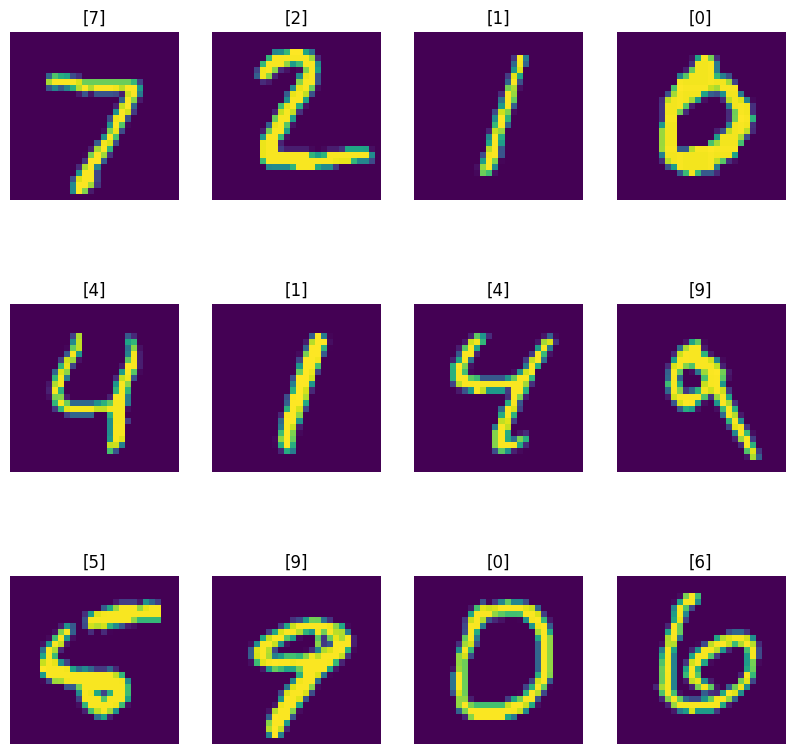

In [16]:
# plt.figure(figsize=(10,10))
# for images,labels in X_test,Y_test:
#     for i in range(10):
#         ax = plt.subplot(3,4,i+1)
#         plt.imshow(X_test[i].numpy().astype('float'))
#         plt.title(Y_test[i])
#         plt.axes("off")
import numpy as np
import cv2

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(X_test, Y_test)):
    if i >= 12:
        break
    
    ax = plt.subplot(3, 4, i + 1)
    correct_label = label
    img= cv2.resize(image,(28,28))
    img = img.reshape(1,28,28,1)
    predicted = model.predict(img)
    res = np.argmax(predicted,axis=1)
    plt.imshow(image) 
    plt.title(res)
    plt.axis('off') 